## Usecase

Optimize markdown reduction values to avoid waste and improve revenue.

For more examples: https://www.google.com/search?q=optimize+markdown+reduction+values

### Additional resources

- https://github.com/datagridsoftware/practical-ml
- https://towardsdatascience.com/
- https://stackoverflow.com/

In [1]:
import pandas as pd
import numpy as np
from datetime import date

### Reading Data

- buil-in & plugins
- CSV, Excel, SQL etc

https://pandas.pydata.org/docs/user_guide/io.html

In [2]:
df = pd.read_csv("raw_data.csv", na_values="?", comment="\t", sep=",", skipinitialspace=True)    
df.sample(10)

,Unnamed: 0,sold,quantity,price,reduction,date,store,days
16318,16318,1.0,1.0,100.00,50.0,2021-08-26 04:07:32,14,2
45101,45101,0.0,24.0,21.35,50.0,2021-11-03 05:37:29,14,2
48694,48694,3.0,3.0,47.64,50.0,2021-08-05 06:55:31,14,3
6451,6451,15.0,16.0,29.00,49.0,2022-04-01 10:16:41,21,1
46228,46228,1.0,1.0,45.45,50.0,2021-11-26 11:02:31,18,1
27002,27002,1.0,8.0,63.63,50.0,2021-11-12 15:18:07,16,2
33050,33050,2.0,2.0,48.09,10.0,2022-02-16 11:00:36,9,4
50788,50788,6.0,6.0,66.27,50.0,2021-12-08 14:03:52,21,4
49787,49787,3.0,3.0,71.73,50.0,2021-12-15 04:07:10,8,2
30889,30889,5.0,5.0,65.81,50.0,2021-08-25 07:41:12,5,3


## Data Wrangling

https://pandas.pydata.org/docs/user_guide/indexing.html

In [3]:
# last elements in the dataframe
df.tail(5)

,Unnamed: 0,sold,quantity,price,reduction,date,store,days
62440,62440,6.0,7.0,47.18,39.0,2021-11-29 03:34:02,22,1
62441,62441,2.0,2.0,82.64,30.0,2021-11-12 09:04:47,18,1
62442,62442,16.0,16.0,53.55,50.0,2021-11-29 07:11:17,14,3
62443,62443,3.0,3.0,162.73,50.0,2021-11-30 03:46:53,1,1
62444,62444,0.0,2.0,94.55,14.0,2021-12-14 11:43:30,19,2


In [4]:
# the "price" column (series)
df["price"]

0         84.46
1         90.82
2         29.00
3         57.18
4         58.09
          ...  
62440     47.18
62441     82.64
62442     53.55
62443    162.73
62444     94.55
Name: price, Length: 62445, dtype: float64

In [5]:
# the data frame containing a single column, price
df[["price"]]

,price
0,84.46
1,90.82
2,29.00
3,57.18
4,58.09
...,...
62440,47.18
62441,82.64
62442,53.55
62443,162.73


In [6]:
# selecting data based on properties
df[ df["quantity"] >= 50 ]

,Unnamed: 0,sold,quantity,price,reduction,date,store,days
161,161,0.0,50.0,55.36,50.0000,2022-02-27 08:08:43,13,0
167,167,0.0,78.0,55.36,50.0000,2022-02-25 06:46:24,2,2
490,490,58.0,62.0,48.08,50.0000,2022-03-02 06:50:21,21,2
535,535,34.0,60.0,43.17,50.2201,2022-03-03 06:14:02,1,1
542,542,75.0,75.0,29.00,50.0345,2022-03-04 02:10:22,15,3
...,...,...,...,...,...,...,...,...
62117,62117,29.0,54.0,36.72,50.0000,2022-01-12 05:43:30,14,0
62224,62224,50.0,50.0,24.54,50.0000,2021-12-17 04:22:24,21,3
62283,62283,56.0,56.0,42.54,50.0000,2021-12-17 06:02:07,15,2
62402,62402,30.0,78.0,23.17,50.0000,2021-11-08 09:01:43,22,2


In [7]:
# slice the data by row and column
df.iloc[-5:, :]

,Unnamed: 0,sold,quantity,price,reduction,date,store,days
62440,62440,6.0,7.0,47.18,39.0,2021-11-29 03:34:02,22,1
62441,62441,2.0,2.0,82.64,30.0,2021-11-12 09:04:47,18,1
62442,62442,16.0,16.0,53.55,50.0,2021-11-29 07:11:17,14,3
62443,62443,3.0,3.0,162.73,50.0,2021-11-30 03:46:53,1,1
62444,62444,0.0,2.0,94.55,14.0,2021-12-14 11:43:30,19,2


In [8]:
# take very second row from 2 to 10
df.iloc[2:10:2, :]

,Unnamed: 0,sold,quantity,price,reduction,date,store,days
2,2,4.0,4.0,29.00,50.0,2022-04-12 04:01:31,17,2
4,4,1.0,1.0,58.09,50.0,2022-04-12 03:59:49,17,2
6,6,2.0,2.0,49.00,50.0,2022-04-11 13:22:13,9,4
8,8,6.0,6.0,61.73,50.0,2022-04-12 03:59:06,17,1


### Data Attributes

In [9]:
# basic information about the data types. The data we use does not have missing values but in general
# data has gaps that need to be addressed before using it
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62445 entries, 0 to 62444
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  62445 non-null  int64  
 1   sold        62445 non-null  float64
 2   quantity    62445 non-null  float64
 3   price       62445 non-null  float64
 4   reduction   62445 non-null  float64
 5   date        62445 non-null  object 
 6   store       62445 non-null  int64  
 7   days        62445 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.8+ MB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,62445.0,31222.000000,18026.463117,0.00,15611.0000,31222.00,46833.00,62444.00
sold,62445.0,4.655793,6.152728,0.00,1.0000,3.00,6.00,99.00
quantity,62445.0,6.505437,8.192482,1.00,2.0000,4.00,8.00,120.00
price,62445.0,78.357198,73.072956,9.99,47.1800,60.82,84.99,4120.91
reduction,62445.0,45.520381,9.118795,1.00,46.6341,50.00,50.00,60.00
store,62445.0,13.439795,6.448160,1.00,8.0000,14.00,19.00,22.00
days,62445.0,2.377260,1.343509,0.00,2.0000,2.00,3.00,30.00


In [11]:
df.nunique()

Unnamed: 0    62445
sold             87
quantity         91
price          1288
reduction      2873
date          62236
store            22
days             27
dtype: int64

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,62445.0,31222.000000,18026.463117,0.00,15611.0000,31222.00,46833.00,62444.00
sold,62445.0,4.655793,6.152728,0.00,1.0000,3.00,6.00,99.00
quantity,62445.0,6.505437,8.192482,1.00,2.0000,4.00,8.00,120.00
price,62445.0,78.357198,73.072956,9.99,47.1800,60.82,84.99,4120.91
reduction,62445.0,45.520381,9.118795,1.00,46.6341,50.00,50.00,60.00
store,62445.0,13.439795,6.448160,1.00,8.0000,14.00,19.00,22.00
days,62445.0,2.377260,1.343509,0.00,2.0000,2.00,3.00,30.00


In [13]:
# various correlation types (Pearson, Kendall, Spearman etc) are available
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
df.corr()

,Unnamed: 0,sold,quantity,price,reduction,store,days
Unnamed: 0,1.000000,-0.020655,-0.018438,0.001804,0.046556,-0.005971,-0.002067
sold,-0.020655,1.000000,0.759721,-0.104834,0.146252,-0.038329,0.114369
quantity,-0.018438,0.759721,1.000000,-0.092513,0.130386,-0.083907,-0.038446
price,0.001804,-0.104834,-0.092513,1.000000,0.013218,-0.059382,0.010085
reduction,0.046556,0.146252,0.130386,0.013218,1.000000,-0.125713,-0.161694
store,-0.005971,-0.038329,-0.083907,-0.059382,-0.125713,1.000000,-0.007676
days,-0.002067,0.114369,-0.038446,0.010085,-0.161694,-0.007676,1.000000


In [14]:
df.cov()

,Unnamed: 0,sold,quantity,price,reduction,store,days
Unnamed: 0,3.249534e+08,-2290.878803,-2722.964832,2376.405712,7652.849025,-694.091282,-50.070479
sold,-2.290879e+03,37.856057,38.294566,-47.132951,8.205513,-1.520643,0.945404
quantity,-2.722965e+03,38.294566,67.116767,-55.382782,9.740529,-4.432512,-0.423164
price,2.376406e+03,-47.132951,-55.382782,5339.656929,8.807372,-27.979965,0.990061
reduction,7.652849e+03,8.205513,9.740529,8.807372,83.152431,-7.391843,-1.980943
store,-6.940913e+02,-1.520643,-4.432512,-27.979965,-7.391843,41.578773,-0.066503
days,-5.007048e+01,0.945404,-0.423164,0.990061,-1.980943,-0.066503,1.805017


### Visualizing the Data

- matplotlib
- seaborn

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [16]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
plt.figure(figsize=(12, 8), dpi=80)

<Figure size 960x640 with 0 Axes>

<Figure size 960x640 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

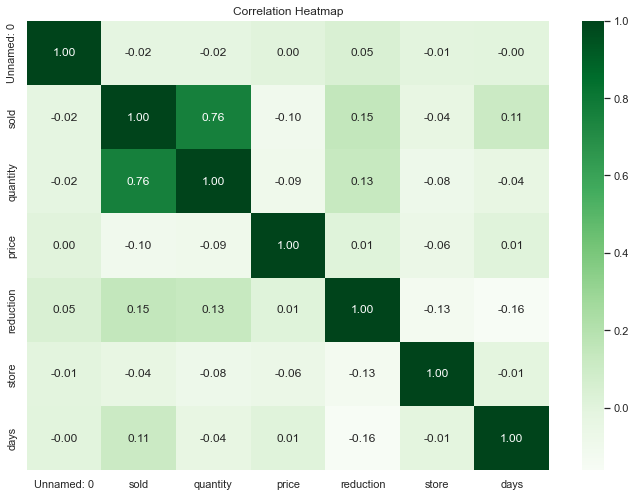

In [17]:
# mask = np.triu(np.ones_like(corr, dtype=bool))
corr = df.corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap="Greens",
)
plt.title("Correlation Heatmap")

<AxesSubplot:xlabel='reduction', ylabel='Count'>

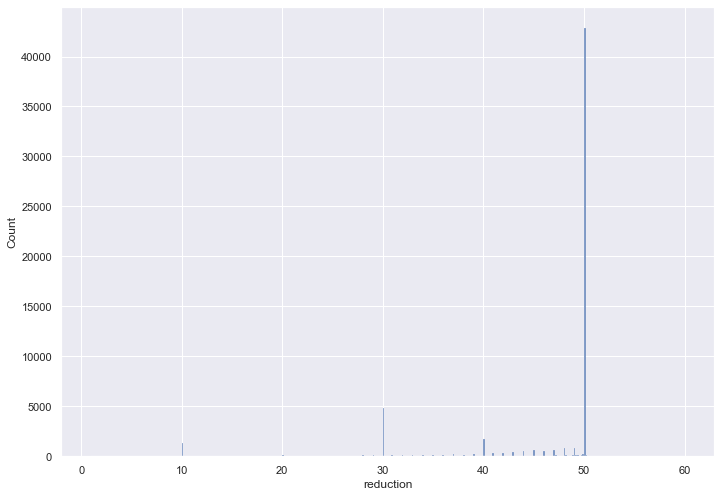

In [18]:
sns.histplot(df, x="reduction")

In [19]:
def plot_rv(df):
    df_plot = df.copy()
    bins_rv = [9, 15, 20, 30, 40, 51]
    df_plot["Reduction Value (binned)"] = pd.cut(df_plot['reduction'], bins_rv)
    
    bins_quantity = [0, 1, 2, 3, 4, 5, 10, 1000]
    df_plot["Quantity (binned)"] = pd.cut(df_plot['quantity'], bins_quantity)

    #plt.hist(df["reductionValue"], alpha=0.3,bins = 20, label="round")
    sns.countplot( x="Reduction Value (binned)", hue="Quantity (binned)", data=df_plot )
    
    plt.show()

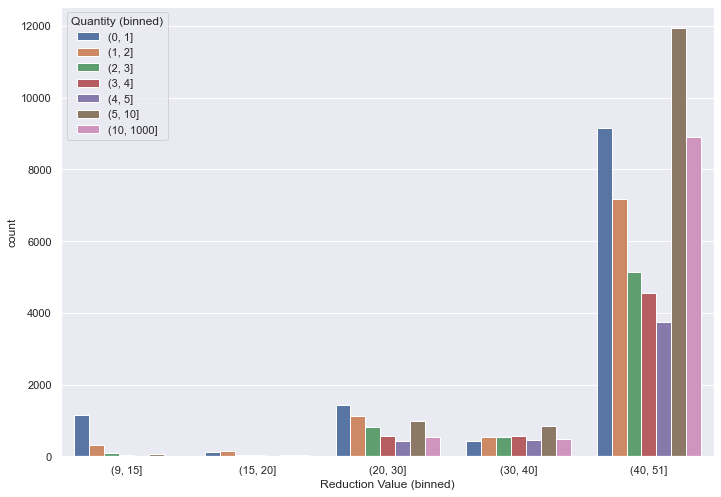

In [20]:
plot_rv(df)

<AxesSubplot:xlabel='days', ylabel='count'>

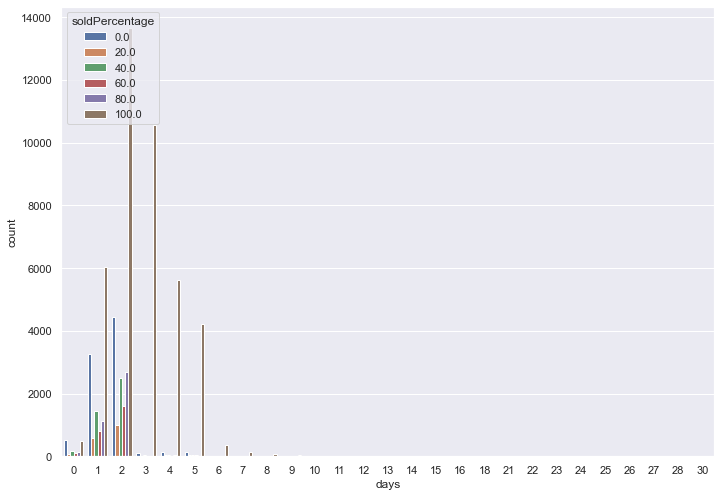

In [21]:
df_plot = df.copy()
df_plot["soldPercentage"] = round(df_plot["sold"] / df_plot["quantity"] * 100)
df_plot["soldPercentage"] = round(df_plot["soldPercentage"] / 20)*20
sns.countplot( x="days", hue="soldPercentage", data=df_plot )

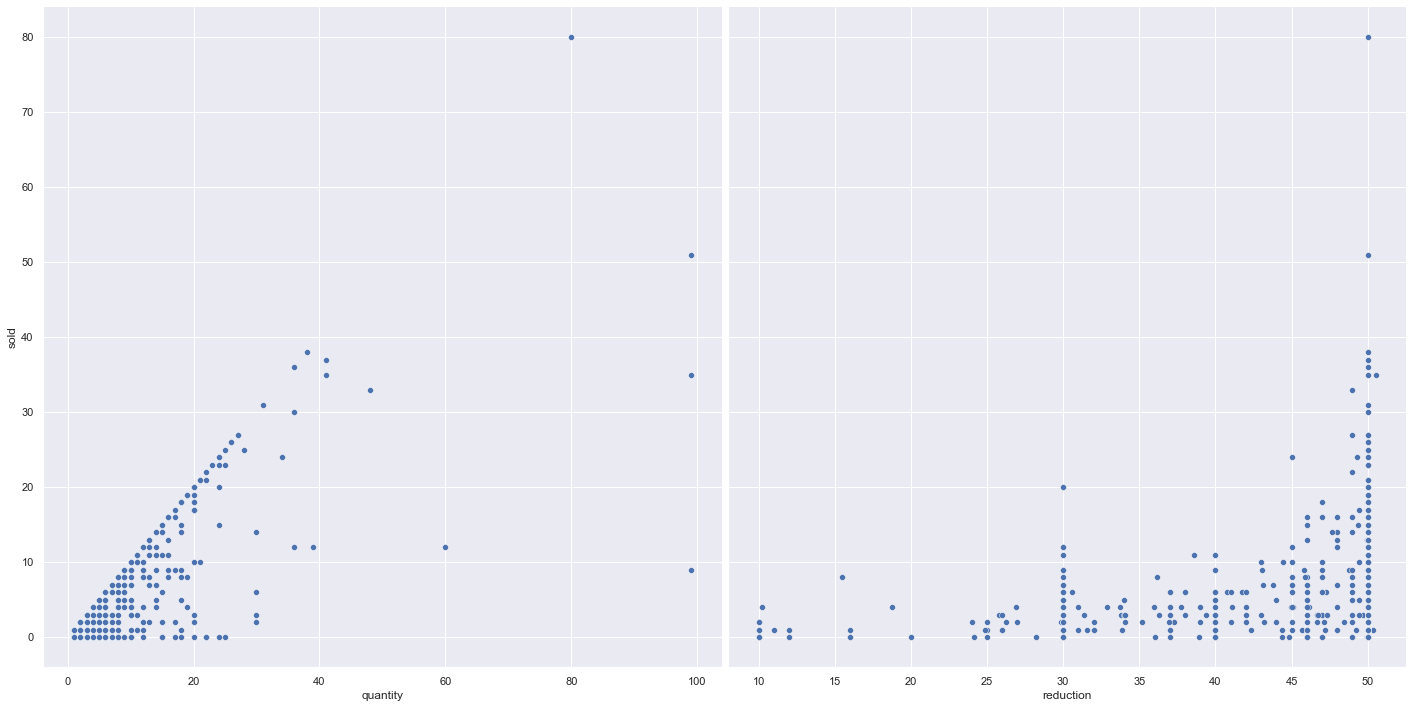

In [22]:
sns.pairplot(df.sample(1000), x_vars=["quantity", "reduction"], y_vars="sold", height=10)

<AxesSubplot:xlabel='reduction'>

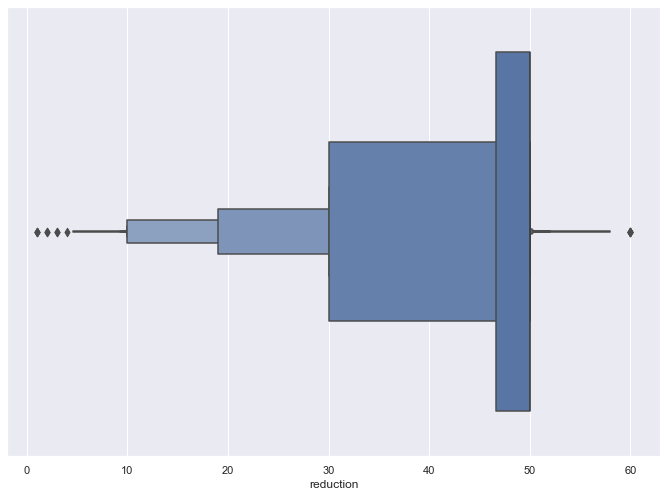

In [23]:
sns.boxenplot(x=df["reduction"])

<AxesSubplot:xlabel='quantity'>

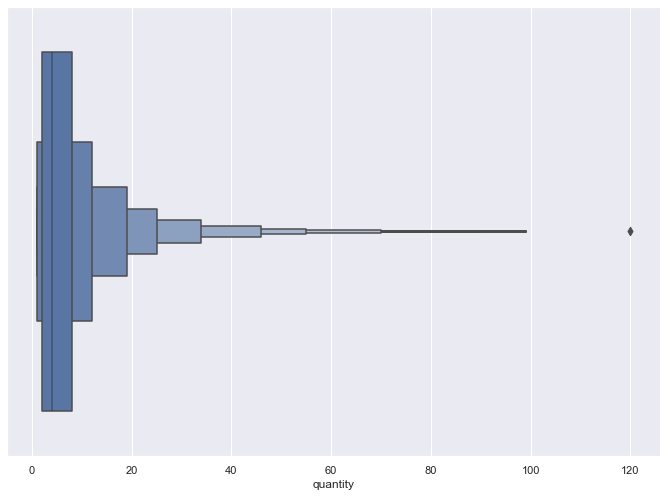

In [24]:
# note the outliers
sns.boxenplot(x=df["quantity"])

<AxesSubplot:>

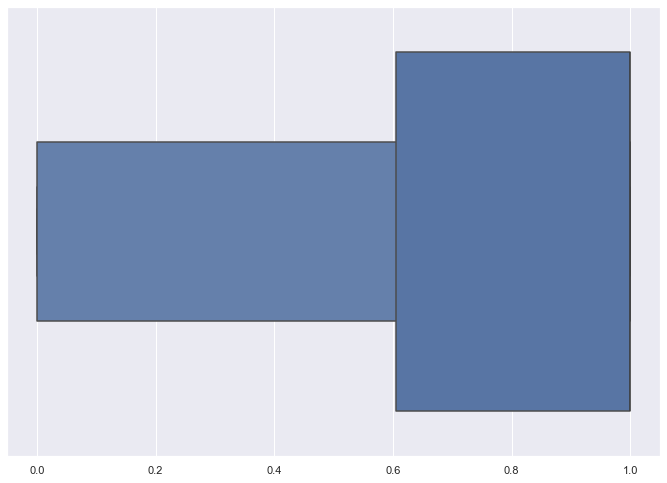

In [25]:
# sold percentage
sns.boxenplot(x=df["sold"]/df["quantity"])

### Naive Linear Regression

- supervised learning
- regression and classification 
- use the subset of features immediatelly usable
- use all the data "as is"
- no feature engineering

H(X) = c + c1*x1 + c2*x2

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**Why linear regression?**

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# first attempt at creating a linear regression model: use all the data as is
X = df.copy()
y = X.pop("sold")

reg = LinearRegression().fit(X, y)

ValueError: could not convert string to float: '2022-04-12 04:00:57'

In [ ]:
# training failed as time fields cannot be used as they are in training
# examine the data structure to identify the features we can use
X.info()

In [28]:
# select the numerical properties
features = ["quantity", "price", "reduction"]
reg = LinearRegression().fit(X[features], y)
y_pred = reg.predict(X[features])
y_pred

array([ 2.21769414,  2.02846854,  3.54249526, ..., 10.22707545,
        2.5727907 ,  1.02798685])

In [29]:
# create a new dataframe including the prediction
df_out = df.copy()
df_out["prediction"] = y_pred
df_out["error"] = df_out["sold"] - df_out["prediction"]
df_out[["sold", "prediction", "error"]].sample(10)

,sold,prediction,error
7403,1.0,1.289016,-0.289016
41336,9.0,6.187809,2.812191
25246,13.0,8.244142,4.755858
10901,4.0,2.105397,1.894603
46149,6.0,4.517065,1.482935
53002,0.0,4.761185,-4.761185
27423,2.0,2.379796,-0.379796
24469,3.0,2.918444,0.081556
21010,7.0,4.496988,2.503012
45562,6.0,4.318117,1.681883


## Assesing the model's quality

What is a model?

### Model Metrics

- MAE, MSE, RMSE, RMLSE
- R2 - coefficient of determination

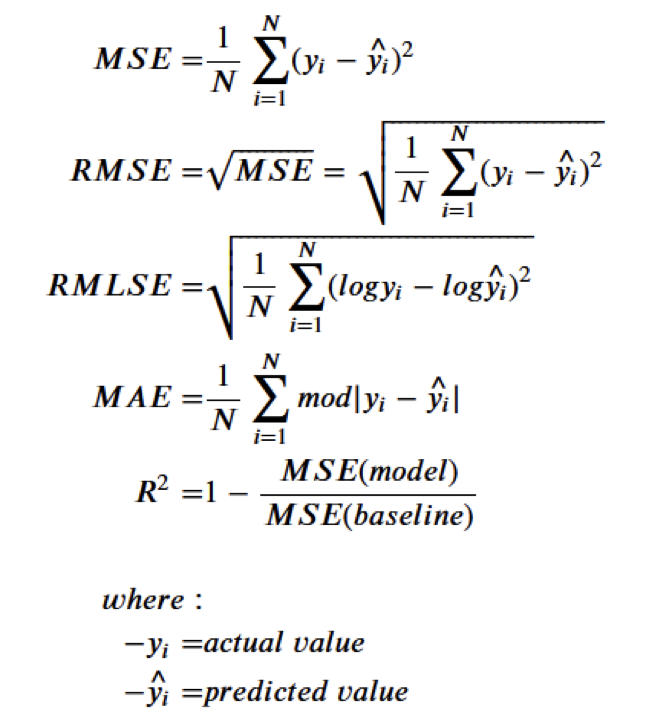

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def print_metrics(y_test, y_pred):
    display("R2: {0}".format(r2_score(y_test, y_pred)))
    display("MAE: {0}".format(mean_absolute_error(y_test, y_pred)))
    display("RMSE: {0}".format(mean_squared_error(y_test, y_pred, squared=False)))
    display("MSE: {0}".format(mean_squared_error(y_test, y_pred, squared=True)))

In [31]:
print_metrics(y, y_pred)

'R2: 0.5807322886890958'

'MAE: 2.171308449960329'

'RMSE: 3.9839136739434293'

'MSE: 15.871568161433432'

In [32]:
# render the regression line and the coefficient of determination
def plot_reg(y_test, y_pred):
    plt.figure(figsize=(10, 8), dpi=80)
    
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')

    y_mean = [np.mean(y_test)]*len(y_test)

    plt.plot(y_test, y_mean, linestyle='--', color="green")
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color="red")

    plt.text(20, 10, 'R-squared = %0.2f' % r2_score(y_test, y_pred), color="red")
    
    plt.show()

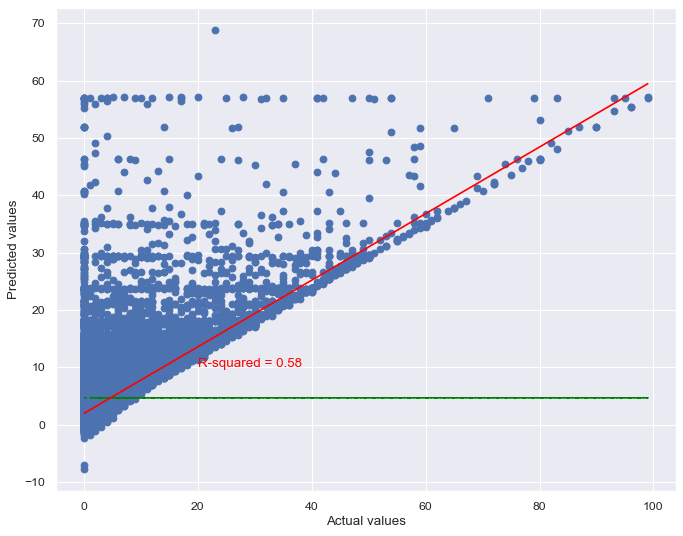

In [33]:
plot_reg(y, y_pred)

### Understanding how well the model generalizes

- assesses how well the model will generalize
- results influenced by how the data is split

#### Model errors

- underfit
- overfit 

#### Underfit (high bias, low variance)
<div>
   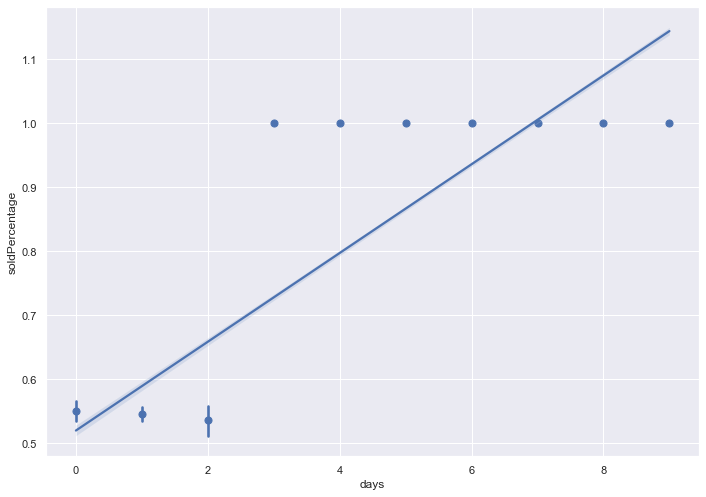
</div>


#### Ok Model
<div>
   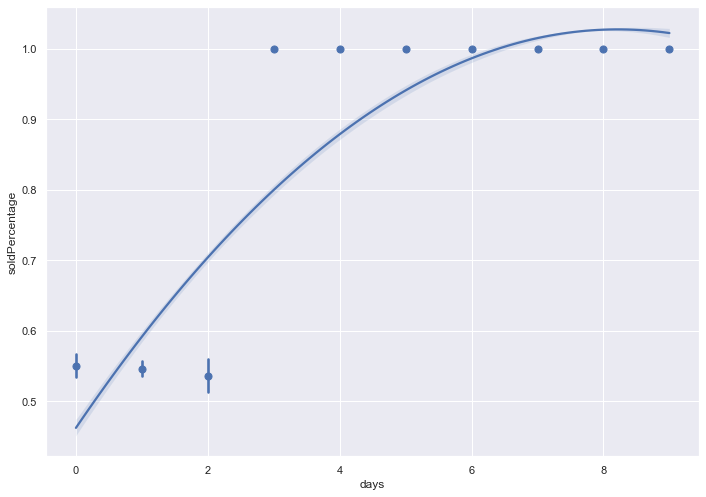
</div>


#### Overfit (low bias, high variance)
<div>
   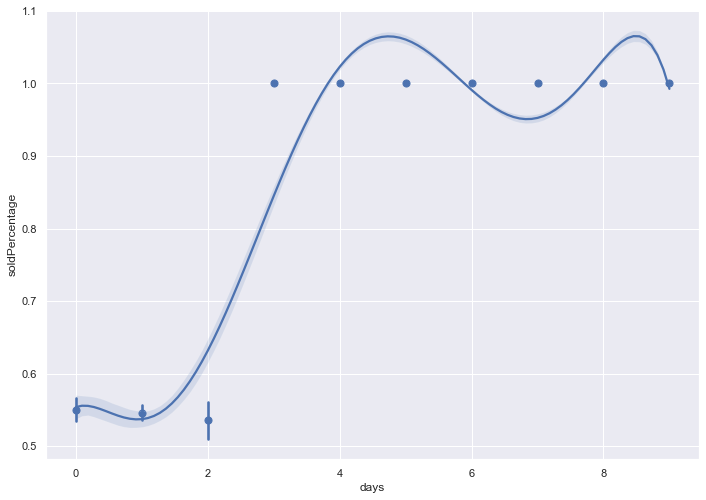
</div>

In [34]:
from sklearn.model_selection import train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [35]:
# training is heavily influenced by the split in the data
for i in range(0, 10):
    x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)
    y_train = x_train.pop("sold")
    y_test = x_test.pop("sold")

    features = ["quantity", "price", "reduction"]
    reg = LinearRegression().fit(x_train[features], y_train)
    y_pred = reg.predict(x_test[features])
    
    r2_train = round(r2_score(y_train, reg.predict(x_train[features])), 2)
    r2_test = round(r2_score(y_test, y_pred), 2)
    print("R2 Train: {0} \t R2 Test {1}".format(r2_train, r2_test))
    #print_metrics(y_test, y_pred)

R2 Train: 0.57 	 R2 Test 0.61
R2 Train: 0.57 	 R2 Test 0.61
R2 Train: 0.57 	 R2 Test 0.61
R2 Train: 0.57 	 R2 Test 0.61
R2 Train: 0.57 	 R2 Test 0.61
R2 Train: 0.57 	 R2 Test 0.61
R2 Train: 0.57 	 R2 Test 0.61
R2 Train: 0.57 	 R2 Test 0.61
R2 Train: 0.57 	 R2 Test 0.61
R2 Train: 0.57 	 R2 Test 0.61


### Visualize the model

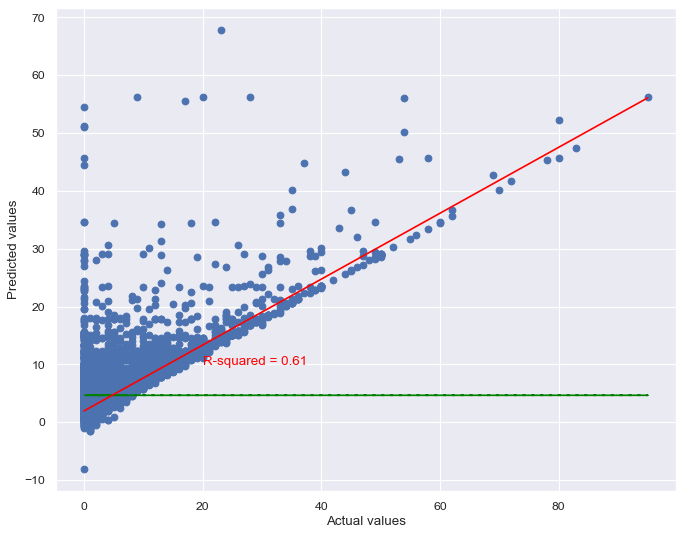

In [36]:
plot_reg(y_test, y_pred)

In [37]:
outdf = x_test.copy()
outdf["y"] = y_test
outdf["pred"] = y_pred

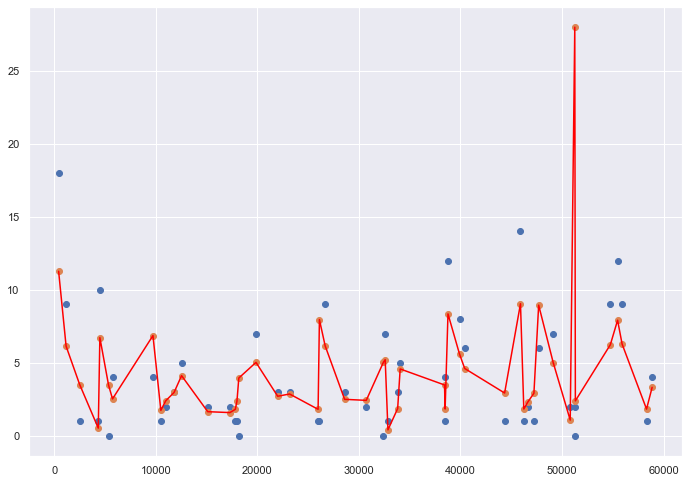

In [38]:
plotdf = outdf.reset_index().sample(50).sort_values(by="index")

#plotdf.plot(kind='scatter', x='index', y='y', color="blue")
#plotdf.plot(kind='scatter', x='index', y='pred', color="red")

plt.scatter(plotdf["index"], plotdf["y"])
plt.scatter(plotdf["index"], plotdf["pred"])

plt.plot(plotdf["index"], plotdf["pred"], color='red')

plt.show()

#### Going from an underfit model to an overfit one

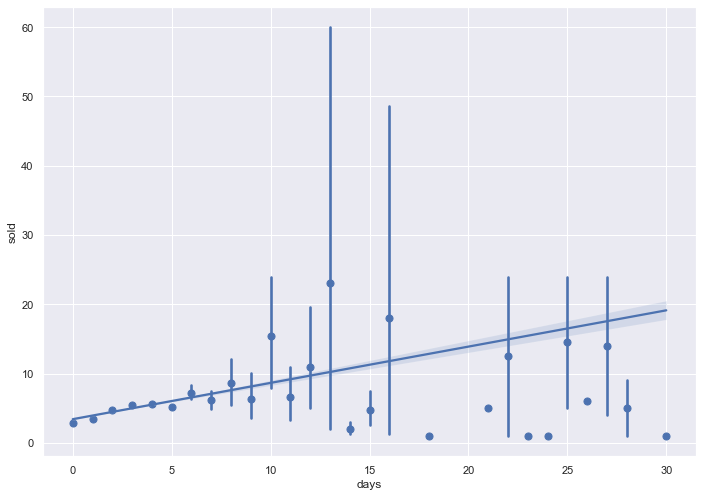

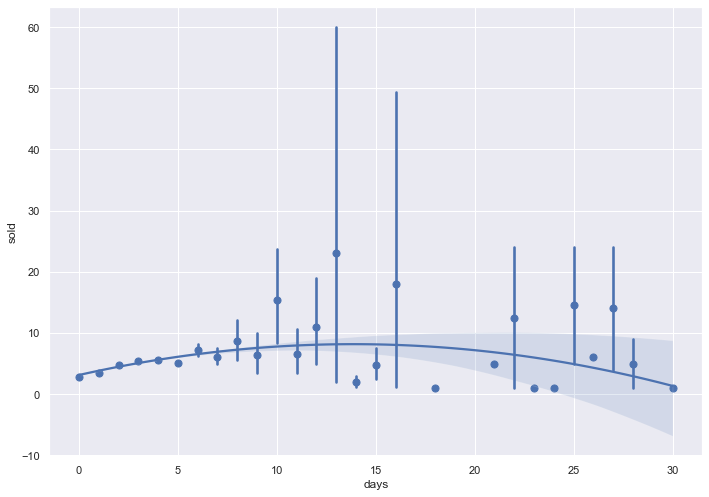

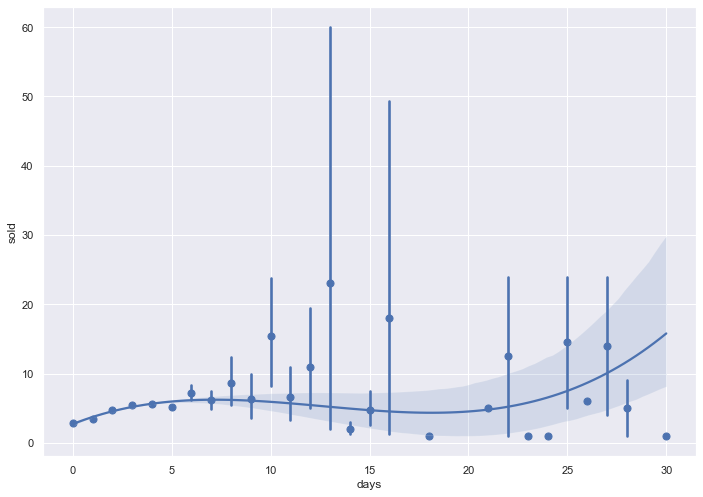

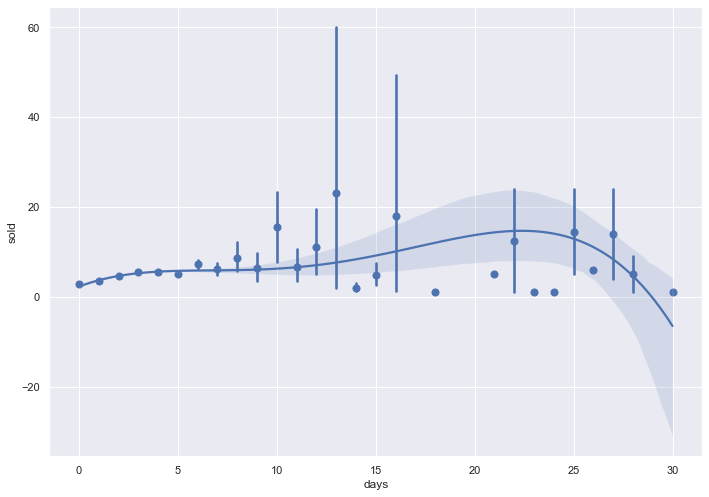

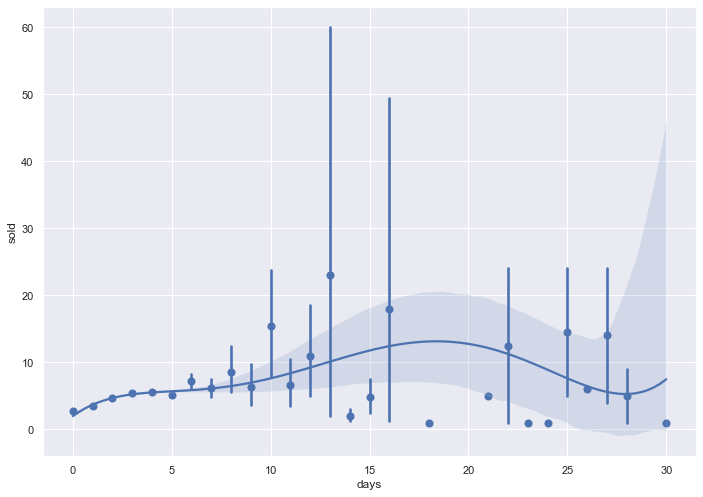

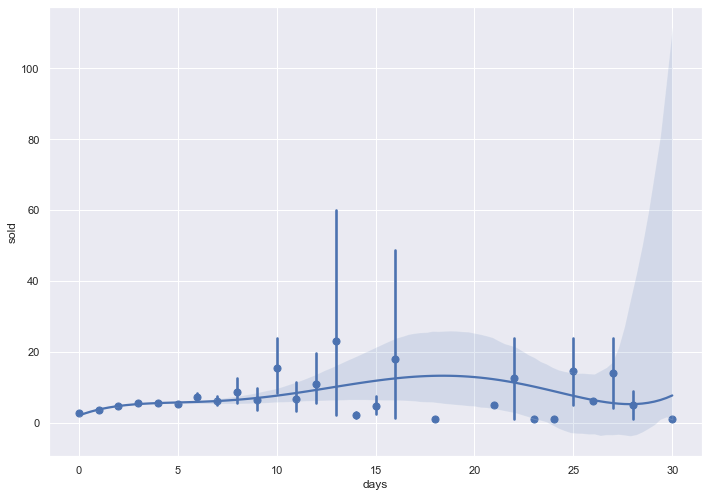

In [39]:
df_plot2 = df.copy()
df_plot2["soldPercentage"] = df_plot2["sold"] / df_plot2["quantity"]

for poly_order in range(1, 7):
    sns.regplot(x="days", y="sold", data=df_plot2, x_estimator=np.mean, order=poly_order);
    plt.show()

#### Tools that do linear regression

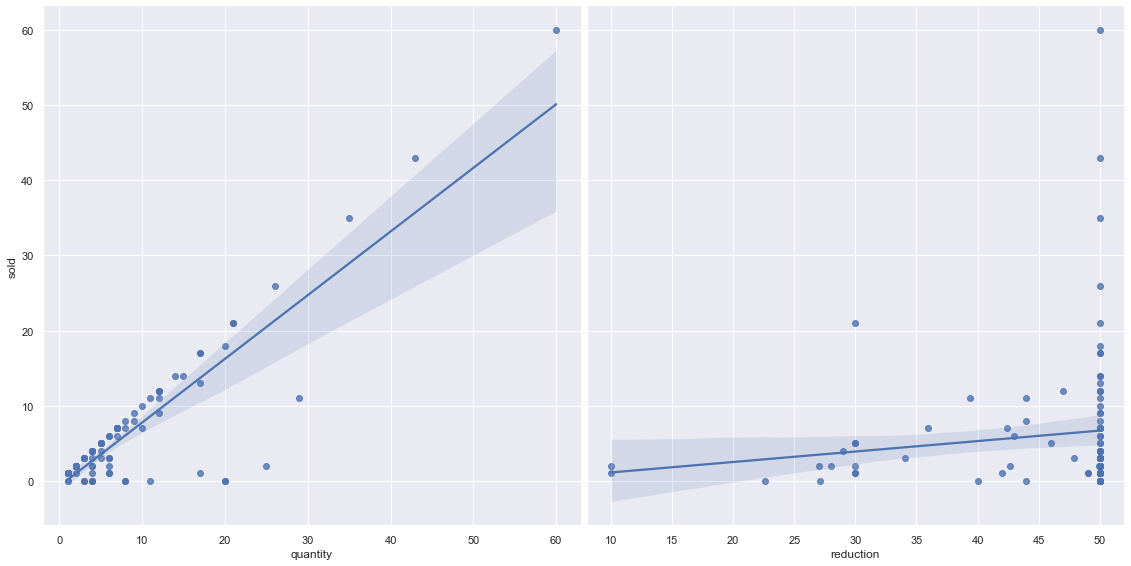

In [40]:
sns.pairplot(df_plot2.sample(100), x_vars=["quantity", "reduction"], y_vars="sold", height=8, kind="reg");

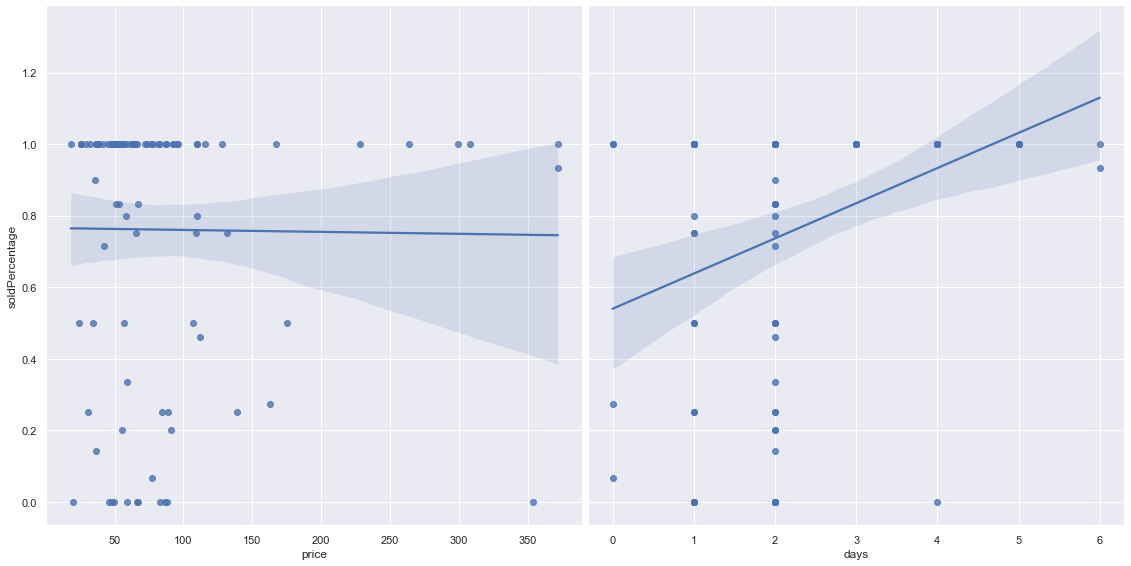

In [41]:
sns.pairplot(df_plot2.sample(100), x_vars=["price", "days"], y_vars="soldPercentage", height=8, kind="reg");

### Improving the Model with Feature Engineering

- use all features irrespective of type
- create features
- drop outliers
- select a subset of features

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

### Data Preparation

https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/

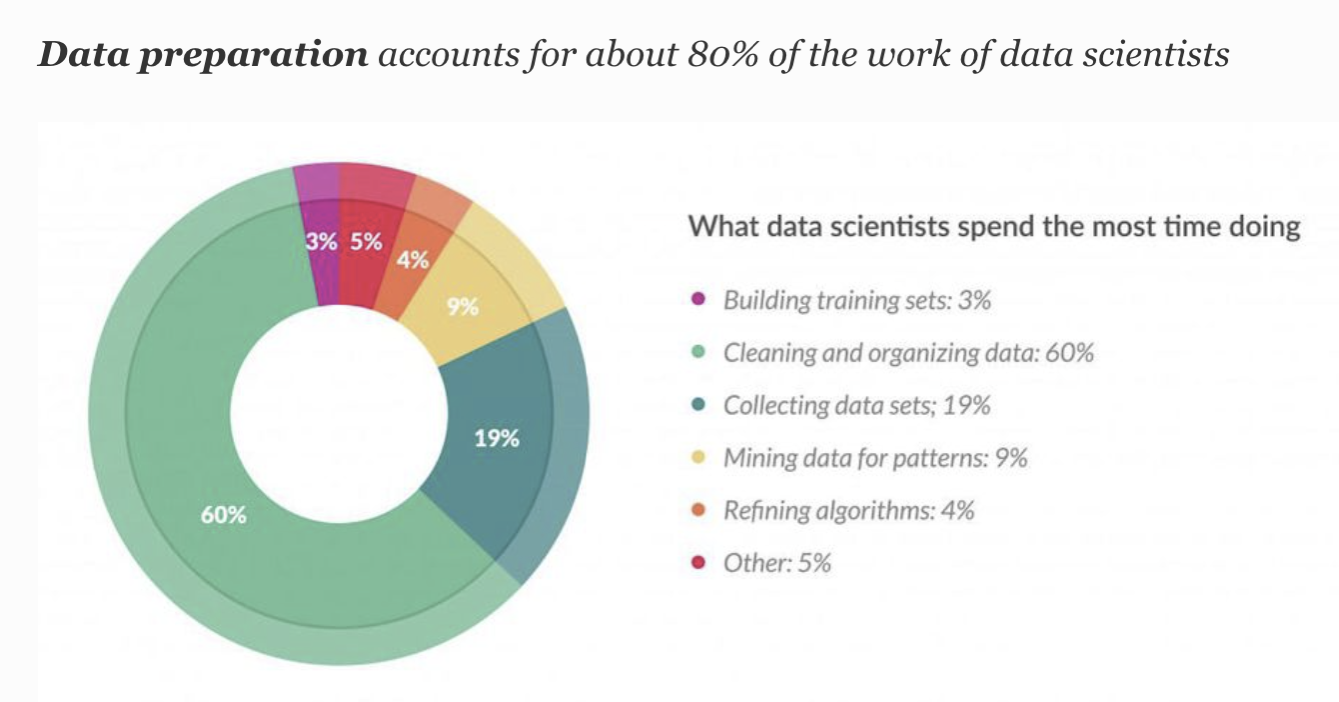

In [42]:
from sklearn.preprocessing import OrdinalEncoder

# transform ordinals into numbers
# extract date properties
# remove outliers (markdowns with more than 50 items)
# NOTE: in practice a pipeline would be used here
def prepare_features(df):
    df_2 = df.copy()
    df_2[["date"]] = df_2[["date"]].apply(pd.to_datetime)
    df_2["month"] = df_2["date"].dt.month
    df_2["year"] = df_2["date"].dt.year
    df_2 = df_2.drop("date", axis=1)
    
    enc = OrdinalEncoder()
    df_2[["store"]] = enc.fit_transform(df_2[["store"]])
    
    print("Outliers {0}".format(df_2[df_2["quantity"] >= 50].shape[0]))
    print("Record count {0}".format(df_2.shape[0]))

    df_2 = df_2[df_2["quantity"] < 50]

    return df_2

### Other techniques for feature engineering

- https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca
- https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

#### What other features have we tried using?
- cos/sin for dates
- polynomial features
- sale rates
- holliday/weekend information
- combined features

In [ ]:
# prepare the data and examine it
df_2 = prepare_features(df)
df_2.sample(10)

In [ ]:
# examine how the new features are correlated to the target variable
corr = df_2.corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap="Greens",
)
plt.title("Correlation Heatmap")

In [ ]:
# train again using all the features
# notice the smaller amplitude of the R2 variation
for i in range(0, 20):
    x_train, x_test = train_test_split(df_2, test_size=0.2, random_state=42)
    y_train = x_train.pop("sold")
    y_test = x_test.pop("sold")

    reg = LinearRegression().fit(x_train, y_train)
    y_pred = reg.predict(x_test)

    print(round(r2_score(y_test, y_pred), 2))
    #print_metrics(y_test, y_pred)

In [ ]:
plot_reg(y_test, y_pred)

### Tree Models

- typically used for classification problems
- prone to overfitting

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)
%time dtree = dtree.fit(x_train, y_train)

display("R2 score on training data: {0}".format(dtree.score(x_train, y_train)))

In [ ]:
y_pred = dtree.predict(x_test)
print_metrics(y_test, y_pred)

In [ ]:
dtree_2 = DecisionTreeRegressor(random_state=42, max_leaf_nodes=10)
%time dtree_2 = dtree_2.fit(x_train, y_train)

display("R2 score on training data: {0}".format(dtree_2.score(x_train, y_train)))

y_pred = dtree_2.predict(x_test)
print_metrics(y_test, y_pred)

### Visualizing Decission Trees

- https://graphviz.org/ is recommended for visualizing the trees

In [ ]:
from sklearn import tree
print(tree.export_text(dtree_2))

In [ ]:
#fig = plt.figure(figsize=(50,50))
tree.plot_tree(dtree_2, max_depth=5, filled=True)

In [ ]:
# how to install missing dependencies?
!pip install graphviz

In [ ]:
try:
    import graphviz
    # DOT data
    with open("dtree2.dot", 'w') as dotfile:
        tree.export_graphviz(dtree_2, max_depth=5, feature_names=x_train.columns.values, out_file=dotfile, filled=True)
        
    dot_data = tree.export_graphviz(dtree_2, max_depth=5, feature_names=x_train.columns.values, out_file=None, filled=True)
    graph = graphviz.Source(dot_data, format="svg") 
    display(graph)
except Exception as e:
    print("Failed rendering to graphviz. Verify that graphviz is installed. Error is: {0}".format(e))



In [ ]:
dtree_2.feature_importances_

### Ensembles

https://scikit-learn.org/stable/modules/ensemble.html

- build a better model by combining multiple weaker models
- for trees: train multiple trees, each on a subset of the data so no tree learns the data "too well" (counters overfitting)
- XGBoost: https://blog.paperspace.com/implementing-gradient-boosting-regression-python/

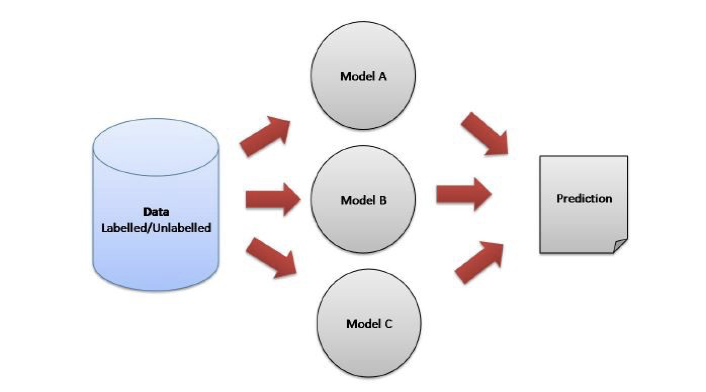

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
%time rf = rf.fit(x_train, y_train)
print("R2 on training data: {0}".format(rf.score(x_train, y_train)))

In [ ]:
y_pred = rf.predict(x_test)
print_metrics(y_test, y_pred)

### Hyper Parameter Optimization

- ML engineering side
- high cost in time and CPU/GPU 
- comes later in the flow and with an overall less impact than other methods (feature engineering, data collection etc)
- may improve the model by a few %

In [ ]:
from xgboost import XGBRegressor

# train using the default parameters
xgb = XGBRegressor()

%time rf = xgb.fit(x_train, y_train)
print("R2 on training data: {0}".format(xgb.score(x_train, y_train)))

y_pred = xgb.predict(x_test)
print_metrics(y_test, y_pred)

In [ ]:
# train using less optimal parameters
xgb = XGBRegressor(base_score=0.5, booster='gbtree', 
       importance_type='gain', 
       learning_rate=0.01, 
       max_delta_step=0,
       n_estimators=100,
       max_depth=15, 
       min_child_weight=1, 
       n_jobs=1,
       random_state=0,
       verbosity=1)

%time rf = xgb.fit(x_train, y_train)
print("R2 on training data: {0}".format(xgb.score(x_train, y_train)))

y_pred = xgb.predict(x_test)
print_metrics(y_test, y_pred)

## Using the Model

- the goal of ML: drive business value from data, help take better decissions
- predict on new data (inference)
- use the raw predictions?

In [ ]:
def gen_dataset_rv(base_df):
    MIN_RV = 10
    MAX_RV = 50
    ROW_NR_COL = "_row_nr"

    test_features_rv = base_df.copy()
    
    test_features_rv = pd.concat([test_features_rv] * (MAX_RV - MIN_RV)).sort_index()
    test_features_rv[ROW_NR_COL] = np.arange(len(test_features_rv))
    test_features_rv["reduction"] = (
        (test_features_rv[ROW_NR_COL] % (MAX_RV - MIN_RV)) + MIN_RV + 1
    )
    test_features_rv.pop(ROW_NR_COL)
        
    return test_features_rv

def postprocess_rv(result_df, predictions, round_values):
    processed_result_df = result_df.copy()

    processed_result_df["predicted"] = predictions
    processed_result_df["predicted"] = np.maximum(0, processed_result_df["predicted"])
    processed_result_df["predicted"] = processed_result_df[["predicted", "quantity"]].min( axis=1)
    if round_values:
        processed_result_df["predicted"] = round(processed_result_df["predicted"], 1)

    df_max = processed_result_df[
        processed_result_df.groupby(processed_result_df.index)["predicted"].transform("max")
        == processed_result_df["predicted"]
    ]
    df_max = df_max.groupby(df_max.index).first()
    
    return df_max

In [ ]:
# build the model on training data than predict on the test data
df_use = prepare_features(df)
x_train_use, x_test_use = train_test_split(df_use, test_size=0.2, random_state=42)
y_train_use = x_train_use.pop("sold")
y_test_use = x_test_use.pop("sold")
    
df_simulation = gen_dataset_rv(x_test_use)
reg_use = LinearRegression().fit(x_train_use, y_train_use)
y_pred = reg_use.predict(df_simulation)

In [ ]:
# plot the best model prediction, observe the results (the model learned what it could from the data)
df_simulation_out = postprocess_rv(df_simulation, y_pred, False)
sns.histplot(df_simulation_out, x="reduction")

In [ ]:
# spread the prediction over a wider range by rounding the predicted values and 
# picking the smallest reduction value that maximizes the sold quantity
df_simulation_out = postprocess_rv(df_simulation, y_pred, True)
sns.histplot(df_simulation_out, x="reduction")

### Further Considerations

- time matters - do not train on data from this year and predict/test on data from 2 years ago
- not a time series - we do not predict the value for the next time interval 

In [ ]:
df_sorted = df.copy().sort_values("date")
df_sorted = prepare_features(df_sorted)
x_train_sorted, x_test_sorted = train_test_split(df_sorted, test_size=0.2, shuffle=False)
y_train_sorted = x_train_sorted.pop("sold")
y_test_sorted = x_test_sorted.pop("sold")

In [ ]:
reg_sorted = LinearRegression().fit(x_train_sorted, y_train_sorted)
y_pred_sorted = reg_sorted.predict(x_test_sorted)
print_metrics(y_test_sorted, y_pred_sorted)

In [ ]:
df_sorted = df.sort_values("date")
df_sorted.head(5)

### Train on  a smaller, more recent window of data

- data skew - customer behavior changed in the past 2 years
- exceptional events - first Covid lockdown in 2020

In [ ]:
df_sorted = df[df["date"] > "2021-09-01"]
display(df_sorted.head())

df_sorted = df_sorted.sort_values("date")
print(df_sorted.shape)
df_sorted = prepare_features(df_sorted)
x_train_new, x_test_new = train_test_split(df_sorted, test_size=0.2, shuffle=False)
y_train_new = x_train_new.pop("sold")
y_test_new = x_test_new.pop("sold")

In [ ]:
reg_new = LinearRegression().fit(x_train_new, y_train_new)
y_pred_new = reg_new.predict(x_test_new)
print_metrics(y_test_new, y_pred_new)

## StatsModels

In [ ]:
# uncomment the next line to install the statsmodels package
# !pip install statsmodels

In [44]:
import statsmodels.formula.api as smf

def train_sm(
    formula,
    df_train,
    df_test,
    y_test,
    alpha=None,
    max_iter=10_000,
):
    md = smf.ols(formula=formula, data=df_train)

    if alpha is None:
        mdf = md.fit()
        display(mdf.summary())
    else:
        mdf = md.fit_regularized(
            method="elastic_net", alpha=alpha, L1_wt=1.0, maxiter=max_iter
        )
        display(mdf.params)

    y_pred = mdf.predict(df_test)
    return print_metrics(y_test, y_pred)


df_sm = df.copy().sort_values("date")
df_sm[["date"]] = df_sm[["date"]].apply(pd.to_datetime)
df_train_sm, x_test_sm = train_test_split(df_sm, test_size=0.2, shuffle=False)
y_test_sm = x_test_sm.pop("sold")

sm_ols_metric = train_sm(
    f"""
        sold 
        
        ~ 

      
        + days 
        
        + price
        
        + reduction

        + quantity
        
    """,
    df_train_sm,
    x_test_sm,
    y_test_sm
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sold   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                 2.001e+04
Date:                Fri, 15 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:19:32   Log-Likelihood:            -1.3696e+05
No. Observations:               49956   AIC:                         2.739e+05
Df Residuals:                   49951   BIC:                         2.740e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8200      0.102    -27.523      0.000      -3.021      -2.619
days           0.7096      0.013     54.516      0.000       0.684       0.735
price         -0.0034      0.000    -14.817      0.000      -0.004      -0.003
reduction      0.0492      0.002     25.161      0.000       0.045       0.053
quantity       0.5814      0.002    270.822      0.000       0.577       0.586
==============================================================================
Omnibus:                    31272.114   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2405291.936
Skew:                          -2.226   Prob(JB):                         0.00
Kurtosis:                      36.701   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'R2: 0.5613009571857868'

'MAE: 2.2856786321796134'

'RMSE: 4.318261495562488'

'MSE: 18.647382344057572'

# Summary

- load data using Pandas
- vizualize the data and it's properties
- select the data to use 
- create the features for the model
- split the data in training and test subsets
- train the model
- asses the model performance on the test dataset
- try other algorithms
- fine tune the algorithm using Hyper Parameter Optimization
- use the model to make predictions
- use the raw predictions or post process them as per business needs